In [164]:
import cv2 
import os 
import numpy as np
import matplotlib.pyplot as plt
import argparse

In [13]:
path = "./photos"
img_path = []
img_name = []
for image_folder in os.listdir(path):
    for image_file in os.listdir(path+"/"+image_folder):
        img_path.append(path+"/"+image_folder+'/'+image_file)
        img_name.append(image_file)

In [22]:
img_path[1]

'./photos/Mitesh sample picture/A004_10.jpg'

In [23]:
def face_extracter(image_path):
    """
    Crops face from image
    image_path: path of the img as string eg: './abc/xyz/image.jpg'
    
    """
    # Read the input image 
    img = cv2.imread(image_path) 

    # Convert into grayscale 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

    # Load the cascade 
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml') 

    # Detect faces 
    faces = face_cascade.detectMultiScale(gray, 1.1, 4) 

    # Draw rectangle around the faces and crop the faces 
    for (x, y, w, h) in faces: 
        #cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2) 
        faces = img[y:y + h, x:x + w]
    return faces
    

In [24]:
cv2.imshow("img",face_extracter(img_path[0]))
cv2.waitKey(0)

-1

In [25]:
face_labels=[]
#for i,j in zip(range(len(img_path)),img_name):
for i in range(len(img_path)):
    face = face_extracter(img_path[i])
    try:
        cv2.imwrite("./faces/"+img_name[i]+'.jpg', face)
        face_labels.append(img_name[i][:4])
    except:
        continue
face_labels = np.array(face_labels)

In [26]:
face_labels.shape

(34,)

In [ ]:
# face_labels=[]
# for i,j in zip(range(len(img_path)),img_name):

#     # Read the input image 
#     img = cv2.imread(img_path[i]) 

#     # Convert into grayscale 
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

#     # Load the cascade 
#     face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml') 

#     # Detect faces 
#     faces = face_cascade.detectMultiScale(gray, 1.1, 4) 
#     # Draw rectangle around the faces and crop the faces 
#     for (x, y, w, h) in faces: 
#         cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2) 
#         faces = img[y:y + h, x:x + w]
#         #cv2.imshow("face",faces) 
#         cv2.imwrite("./faces/"+img_name[i]+'.jpg', faces)
#         face_labels.append(img_name[i][:4])
# face_labels = np.array(face_labels)
#     # Display the output 
#     # cv2.imwrite('detcted.jpg', img) 
#     # cv2.imshow('img', img) 
#     # cv2.waitKey()

In [32]:
def img_preprocessor(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # resize image 64x64
    width = 64
    height = 64
    dim = (width, height)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized

faces_list = []
for croped_face in os.listdir('./faces'):
    resized = img_preprocessor('./faces/'+croped_face)
    faces_list.append(resized)
face_arr = np.array(faces_list)


In [34]:
face_arr.shape

(34, 64, 64)

In [33]:
# faces_list = []
# for croped_face in os.listdir('./faces'):
#     img = cv2.imread('./faces/'+croped_face)
#     img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     # resize image
#     width = 64
#     height = 64
#     dim = (width, height)
#     resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

#     faces_list.append(resized)
# face_arr = np.array(faces_list)
#img = cv2.imread(img_path[0])
cv2.imshow('img',face_arr[0])
cv2.waitKey(0)

-1

# Training 

In [39]:
x=face_arr.reshape((face_arr.shape[0],face_arr.shape[1]*face_arr.shape[2]))
print("After reshape:",x.shape)

After reshape: (34, 4096)


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, face_labels, test_size=0.20, stratify=face_labels, random_state=0)
print("x_train shape:",x_train.shape)
print("y_train shape:{}".format(y_train.shape))

x_train shape: (27, 4096)
y_train shape:(27,)


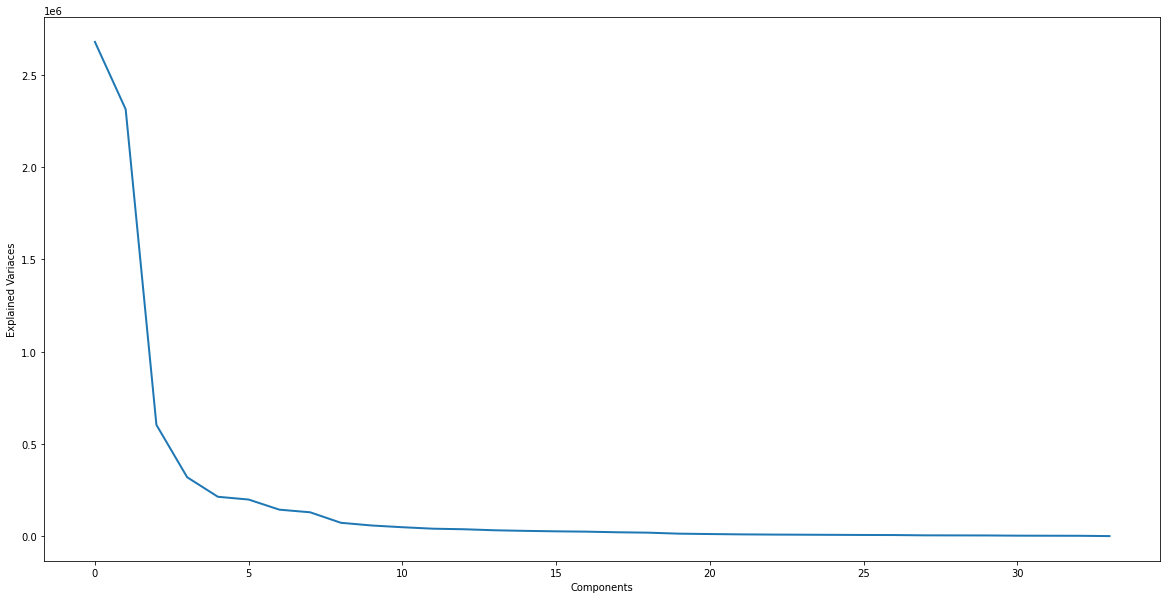

In [43]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(x)

plt.figure(1, figsize=(20,10))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()


In [44]:
pca=PCA(n_components=3, whiten=True)
pca.fit(x)

PCA(n_components=3, whiten=True)

Text(0.5, 1.0, 'Average Face')

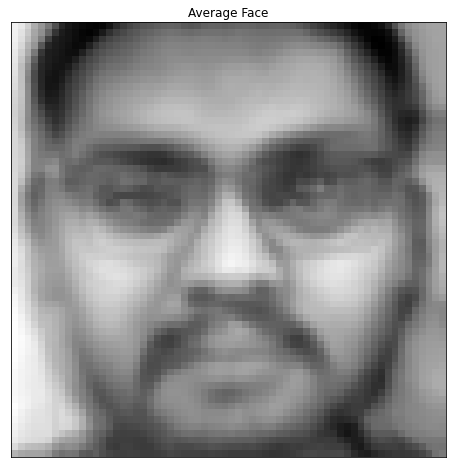

In [45]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

Text(0.5, 0.98, 'All Eigen Faces')

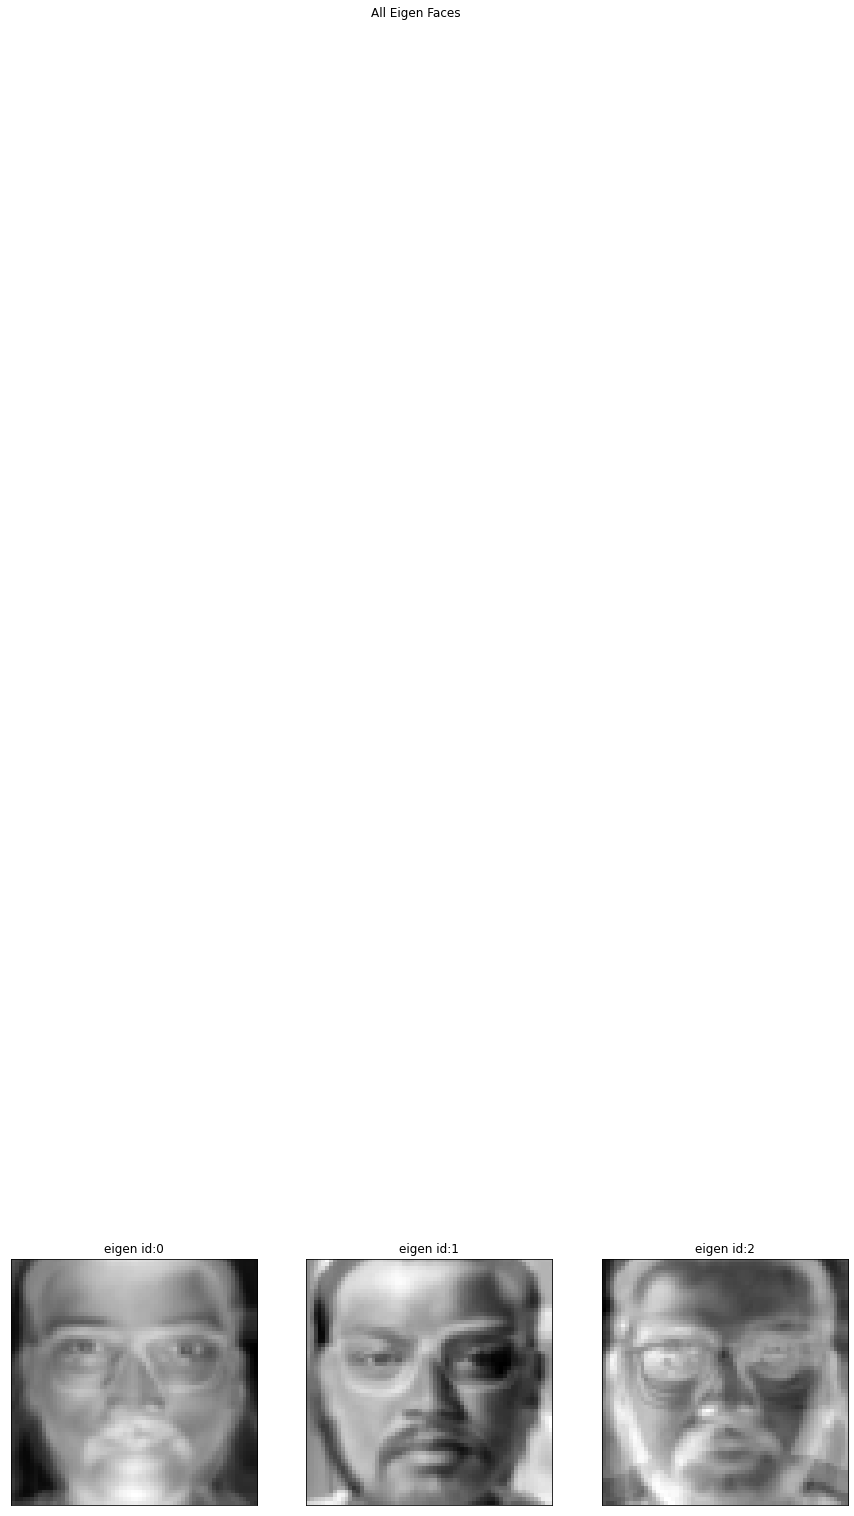

In [46]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, face_arr.shape[1], face_arr.shape[2]))

cols=3
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,40))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [47]:
x_train_pca=pca.transform(x_train)
x_test_pca=pca.transform(x_test)
print(f"Shape before {x_train.shape} vs shape after {x_train_pca.shape}")

Shape before (27, 4096) vs shape after (27, 3)


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score

clf = LogisticRegression()
clf.fit(x_train_pca, y_train)
y_pred = clf.predict(x_test_pca)

#print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

PM_accuracy = round(clf.score(x_test_pca, y_test)*100,2)
acc = accuracy_score(y_pred,y_test)

print("PM_accuracy is %", PM_accuracy)
print("Accuracy is %", acc)

PM_accuracy is % 100.0
Accuracy is % 1.0


# Using transfer learning

In [37]:
import pickle
pca_tl = pickle.load(open("pca.sav",'rb'))
clf_tl = pickle.load(open("logistic_clf.sav",'rb'))

In [38]:
x_train_pca=pca_tl.transform(x_train)
x_test_pca=pca_tl.transform(x_test)
print(f"Shape before {x_train.shape} vs shape after {x_train_pca.shape}")

NameError: name 'x_train' is not defined

In [ ]:
x_train_pca.shape,x_test_pca.shape,y_train.shape


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = clf_tl
clf.fit(x_train_pca, y_train)
y_pred_tl = clf.predict(x_test_pca)

#print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

PM_accuracy = round(clf.score(x_test_pca, y_test)*100,2)

print("PM_accuracy is %", PM_accuracy)

In [ ]:
y_pred_tl

# Real Testing

In [153]:
person_img = "A027_2.jpg"
test_img = cv2.imread("E:/Python/Sam_facedetection/Test Data/"+person_img)
gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)
cv2.imshow('img',gray)
cv2.waitKey(0)

-1

In [156]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
# Detect faces 
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
faces = np.reshape(faces[0],(1,4))
# crop the faces 
for (x, y, w, h) in faces:
    cv2.rectangle(test_img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    #faces = test_img[y:y + h, x:x + w]
    cv2.imshow("face",test_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [157]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
# Detect faces 
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
faces = np.reshape(faces[0],(1,4))
# crop the faces 
for (x, y, w, h) in faces:
    cv2.rectangle(test_img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    faces = test_img[y:y + h, x:x + w]
    #cv2.imshow("face",faces)
    cv2.imwrite("./TestFaces/"+person_img, faces)
#img = cv2.imread('./faces/'+croped_face)
img = cv2.cvtColor(faces,cv2.COLOR_BGR2GRAY)
# resize image
width = 64
height = 64
dim = (width, height)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
resized_arr = np.array([resized])
test_face=resized.reshape((resized_arr.shape[0],64*64))
print("After reshape:",test_face.shape)

After reshape: (1, 4096)


In [158]:
cv2.imshow('img',resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [159]:
test_face_tfd = pca.transform(test_face)
clf.predict(test_face_tfd)

array(['A027'], dtype='<U4')

In [160]:
clf.classes_

array(['A004', 'A020', 'A027'], dtype='<U4')

In [165]:
camera_device = args.camera
#-- 2. Read the video stream
cap = cv2.VideoCapture(camera_device)
if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)
while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break
    detectAndDisplay(frame)
    if cv2.waitKey(10) == 27:
        break

NameError: name 'args' is not defined